# Time Series Forecasting Models
### <font color=blue>Simple Exponential Smoothing / Simple Moving Average</font>
This is the simplest to forecast. $\hat{y}$ is equal to the most recent value in the dataset, and the forecast plot is simply a horizontal line extending from the most recent value.
### <font color=blue>Double Exponential Smoothing / Holt's Method</font>
This model takes trend into account. Here the forecast plot is still a straight line extending from the most recent value, but it has slope.
### <font color=blue>Triple Exponential Smoothing / Holt-Winters Method</font>
This model has (so far) the "best" looking forecast plot, as it takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## First Prediction Model

In [2]:
df = pd.read_csv('Dataset\Airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
df.index.freq = 'MS'

In [7]:
train = df.iloc[:109] 
test = df.iloc[108:]

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fittedModel = ExponentialSmoothing(train['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [9]:
test_pred = fittedModel.forecast(36)

In [10]:
test_pred

1958-02-01    339.140753
1958-03-01    399.273261
1958-04-01    394.217641
1958-05-01    402.533183
1958-06-01    473.138213
1958-07-01    521.812783
1958-08-01    514.550028
1958-09-01    446.241204
1958-10-01    385.441704
1958-11-01    339.652393
1958-12-01    381.450499
1959-01-01    401.214459
1959-02-01    387.154433
1959-03-01    455.800170
1959-04-01    450.028804
1959-05-01    459.521615
1959-06-01    540.122515
1959-07-01    595.688163
1959-08-01    587.397188
1959-09-01    509.417577
1959-10-01    440.010417
1959-11-01    387.738509
1959-12-01    435.454160
1960-01-01    458.016192
1960-02-01    441.965626
1960-03-01    520.329848
1960-04-01    513.741403
1960-05-01    524.578154
1960-06-01    616.590087
1960-07-01    680.022413
1960-08-01    670.557647
1960-09-01    581.538112
1960-10-01    502.304669
1960-11-01    442.632391
1960-12-01    497.103362
1961-01-01    522.859602
Freq: MS, dtype: float64

In [11]:
test

,Thousands of Passengers
Month,
1958-01-01,340
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363
1958-06-01,435
1958-07-01,491
1958-08-01,505
1958-09-01,404


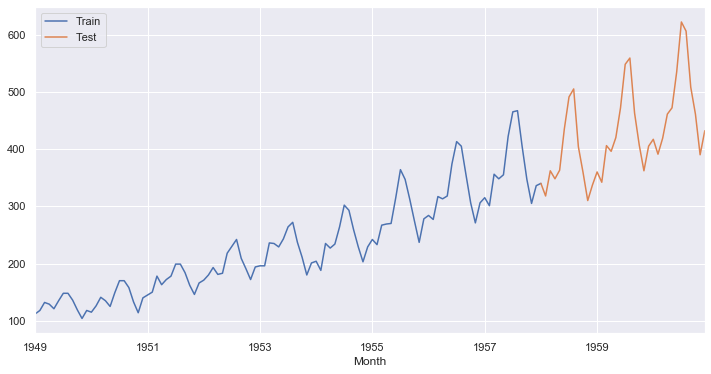

In [15]:
train['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12,6))
test['Thousands of Passengers'].plot(legend=True, label='Test')


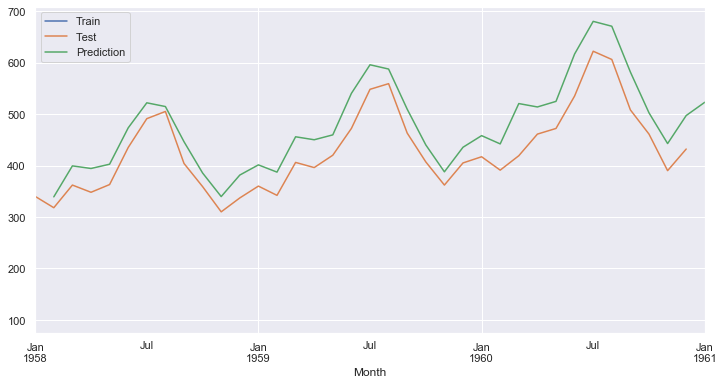

In [18]:
train['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12,6))
test['Thousands of Passengers'].plot(legend=True, label='Test')
test_pred.plot(legend=True, label='Prediction', xlim=['1958-01-01','1961-01-01'])

## Evaluation

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
mae = mean_absolute_error(test, test_pred)
mse = mean_squared_error(test, test_pred)


In [25]:
mae

63.02788111254798

In [26]:
mse

5613.981095122569

In [27]:
np.sqrt(mse)

74.92650462368152

## Final Model

In [28]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [29]:
pred = final_model.forecast(36)

In [30]:
pred

1961-01-01    450.690016
1961-02-01    424.836631
1961-03-01    475.537893
1961-04-01    504.073753
1961-05-01    517.886839
1961-06-01    590.175664
1961-07-01    684.243770
1961-08-01    678.053933
1961-09-01    567.119289
1961-10-01    507.820596
1961-11-01    434.729856
1961-12-01    485.993231
1962-01-01    502.768037
1962-02-01    473.927249
1962-03-01    530.487129
1962-04-01    562.320358
1962-05-01    577.729571
1962-06-01    658.371497
1962-07-01    763.309336
1962-08-01    756.404253
1962-09-01    632.650917
1962-10-01    566.500156
1962-11-01    484.963653
1962-12-01    542.150601
1963-01-01    560.863765
1963-02-01    528.690373
1963-03-01    591.785847
1963-04-01    627.297461
1963-05-01    644.487236
1963-06-01    734.447477
1963-07-01    851.511068
1963-08-01    843.808090
1963-09-01    705.754839
1963-10-01    631.960242
1963-11-01    541.002053
1963-12-01    604.797053
Freq: MS, dtype: float64

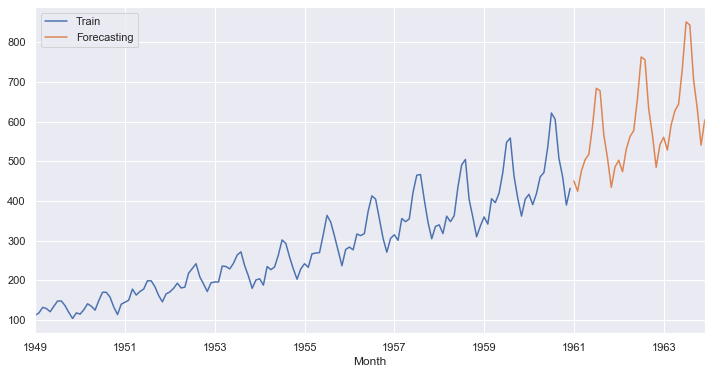

In [31]:
df['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12,6))
pred.plot(legend=True, label='Forecasting')

## Staionarity
data does not exhibit trends or seasonality

In [32]:
df2 = pd.read_csv('Dataset\samples.csv', index_col=0, parse_dates=True)

In [33]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


In [36]:
df2.index

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '1959-03-01', '1959-04-01', '1959-05-01', '1959-06-01',
               '1959-07-01', '1959-08-01', '1959-09-01', '1959-10-01',
               '1959-11-01', '1959-12-01'],
              dtype='datetime64[ns]', length=120, freq=None)

In [37]:
df2.index.freq='MS'

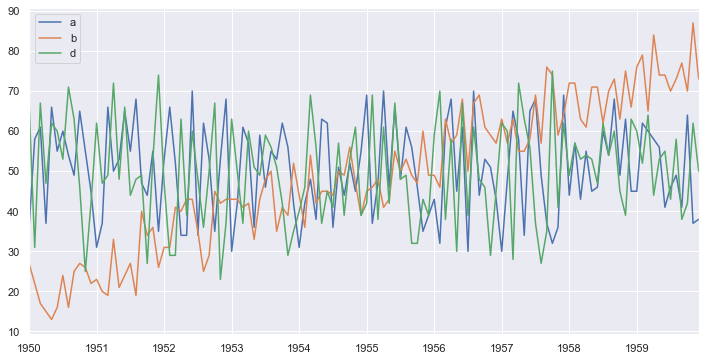

In [38]:
df2[['a','b','d']].plot(figsize=(12,6))

Quantatively whether it is stationary or not?

In [39]:
from statsmodels.tsa.statespace.tools import diff
df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Freq: MS, Name: b, Length: 120, dtype: float64

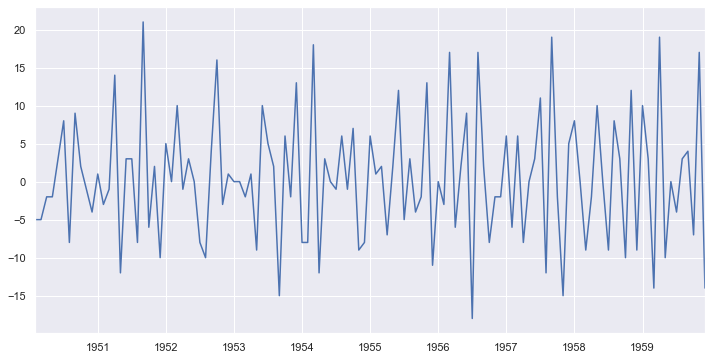

In [42]:
diff(df2['b'], k_diff=1).plot(figsize=(12,6))